# Project 1: SAT & ACT Analysis

## Problem Statement

SAT participation rates have been declining over the years as more colleges are opting out of the requirement that standardized test scores be part of a student's application, and as more states are making are making them optional.

## Executive Summary

This proposal analyzes the nation-wide SAT and ACT data from the past two years, in order to suggest one state with a lower participation rate and provide recommendations for how the College Board might increase participation amongst graduating seniors in that state.

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [More Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

In [347]:
#Imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [348]:
#Code:
sat17 = pd.read_csv('../data/sat_2017.csv')
act17 = pd.read_csv('../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [349]:
#Code:
sat17.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [350]:
act17.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer:

The datasets contain the participation rates, the average per subject scores and the average total test scores for each state for the SAT and the ACT from 2017. 

In [127]:
sat17.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


In [128]:
act17.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


#### 4a. Does the data look complete? 

In [129]:
sat17.isnull().sum()

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

In [130]:
act17.isnull().sum()

State            0
Participation    0
English          0
Math             0
Reading          0
Science          0
Composite        0
dtype: int64

Answer: The data looks complete, as there are no null values.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

Answer: 

The minimum value for SAT Math can't be 52 because it should be at least 200.

The minimum value for ACT Science(2.3) looks very low considering the range of values.

SAT:

Minimum possible value for each sub test is 200, and total is 400.

Maximum possible value for each sub test is 800, and total is 1600.

ACT:

Minimum possible value for each sub test is 1, and composite is 1.

Maximum possible value for each sub test is 36, and composite is 36.


#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [351]:
#code
sat17.loc[20, 'Math'] = 524
sat17.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,556.882353,1126.098039
std,45.666901,47.121395,92.494812
min,482.000000,468.000000,950.000000
25%,533.500000,523.500000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


In [352]:
act17.loc[21, 'Science'] = 23.2
act17.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.442308
std,2.332132,1.963602,2.048672,1.723351
min,16.300000,18.000000,18.100000,18.200000
25%,19.000000,19.400000,20.475000,19.975000
50%,20.550000,20.900000,21.700000,21.300000
75%,23.300000,23.100000,24.125000,23.200000
max,25.500000,25.300000,26.000000,24.900000


#### 5. What are your data types? 
Display the data types of each feature. 

In [353]:
#code
sat17.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [354]:
act17.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer:

Participation for SAT and ACT, and Composite for ACT should be float.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [355]:
sat17['Participation'] = sat17['Participation'].map(lambda string: float(string.rstrip('%'))*0.01)

In [356]:
sat17.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [357]:
act17['Participation'] = act17['Participation'].map(lambda string: float(string.rstrip('%'))*0.01)

In [358]:
act17.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

- Fix any individual values preventing other columns from being the appropriate type.

In [359]:
#code
act17 = act17.replace('20.2x', '20.2')

- Finish your data modifications by making sure the columns are now typed appropriately.

In [362]:
act17['Composite']=act17['Composite'].astype(float)

- Display the data types again to confirm they are correct.

In [364]:
#code
sat17.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [365]:
#Code:
act17.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [366]:
#code
act17.columns = act17.columns.str.lower() + '_act' + '17'
act17.columns = act17.columns.str.replace(' ', '_')

sat17.columns = sat17.columns.str.lower() + '_sat' + '17'
sat17.columns = sat17.columns.str.replace(' ', '_')

In [367]:
sat17.columns.values[0] = 'state'
act17.columns.values[0] = 'state'

In [368]:
act17.head()

,state,participation_act17,english_act17,math_act17,reading_act17,science_act17,composite_act17
0,National,0.60,20.3,20.7,21.4,21.0,21.0
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4


In [369]:
sat17.head()

,state,participation_sat17,evidence-based_reading_and_writing_sat17,math_sat17,total_sat17
0,Alabama,0.05,593,572,1165
1,Alaska,0.38,547,533,1080
2,Arizona,0.30,563,553,1116
3,Arkansas,0.03,614,594,1208
4,California,0.53,531,524,1055


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

This is a data dictionary for the entire dataset

| Feature             	| Type   	| Dataset  	| Description              	|
|---------------------	|--------	|----------	|--------------------------	|
| state               	| object 	| n/a      	| US State                 	|
| participation_act17 	| float  	| ACT 2017 	| Participation Percentage 	|
| english_act17       	| float  	| ACT 2017 	| Average English Score    	|
| math_act17          	| float  	| ACT 2017 	| Average Math Score       	|
| reading_act17       	| float  	| ACT 2017 	| Average Reading Score    	|
| science_act17       	| float  	| ACT 2017 	| Average Science Score    	|
| composite_act17     	| float  	| ACT 2017 	| Average Composite Score  	|
| participation_sat17 	| float  	| SAT 2017 	| Participation Percentage 	|
| reading_sat17       	| int    	| SAT 2017 	| Average Reading Score    	|
| math_sat17          	| int    	| SAT 2017 	| Average Math Score       	|
| total_sat17         	| int    	| SAT 2017 	| Average Total Score      	|
| participation_act18 	| float  	| ACT 2018 	| Participation Percentage 	|
| composite_act18     	| float  	| ACT 2018 	| Average Composite Score  	|
| participation_sat18 	| float  	| SAT 2018 	| Participation Percentage 	|
| reading_sat18       	| float  	| SAT 2018 	| Average Reading Score    	|
| math_sat18          	| float  	| SAT 2018 	| Average Math Score       	|
| total_sat18         	| float  	| SAT 2018 	| Average Total Score      	|

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [370]:
#code
print(act17.shape)
print(sat17.shape)

for state in act17['state'].values:
    if state not in sat17['state'].values:
        drop = state
act17 = act17[act17['state']!=drop]

(52, 7)
(51, 5)


In [371]:
act17 = act17.reset_index(drop=True)

In [372]:
print(act17.shape)
print(sat17.shape)

(51, 7)
(51, 5)


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [373]:
#Code:
combined17 = pd.merge(act17, sat17, on='state')
combined17.head()

,state,participation_act17,english_act17,math_act17,reading_act17,science_act17,composite_act17,participation_sat17,evidence-based_reading_and_writing_sat17,math_sat17,total_sat17
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,1165
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547,533,1080
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563,553,1116
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614,594,1208
4,California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531,524,1055


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [374]:
#code
combined17.to_csv('../data/combined_2017.csv',index=False)

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [392]:
sat18 = pd.read_csv('../data/sat_2018.csv')
act18 = pd.read_csv('../data/act_2018.csv')

In [393]:
sat18.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,563.686275,556.235294,1120.019608
std,47.502627,47.772623,94.155083
min,480.000000,480.000000,977.000000
25%,534.500000,522.500000,1057.500000
50%,552.000000,544.000000,1098.000000
75%,610.500000,593.500000,1204.000000
max,643.000000,655.000000,1298.000000


In [394]:
act18.describe()

,Composite
count,52.000000
mean,21.544231
std,2.119417
min,17.700000
25%,19.975000
50%,21.300000
75%,23.725000
max,25.600000


Count for ACT'18 is 52. Observed that 'Maine' is listed twice.

In [395]:
act18.drop(20, axis=0, inplace=True) #Deletes the extra row

In [396]:
act18 = act18.reset_index(drop=True) #Resets the index after dropping the row

In [397]:
act18.dtypes

State             object
Participation     object
Composite        float64
dtype: object

In [398]:
sat18.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [399]:
# Changing the data type of "Participation" for both SAT and ACT to 'float'
act18['Participation'] = act18['Participation'].map(lambda string: float(string.rstrip('%'))*0.01)

In [400]:
sat18['Participation'] = sat18['Participation'].map(lambda string: float(string.rstrip('%'))*0.01)

In [401]:
# Renaming all columns to make the 2018 data ready to be combined with the 2017 data, and changing to lower case

act18.columns = act18.columns.str.lower() + '_act' + '18'
act18.columns = act18.columns.str.replace(' ', '_')

sat18.columns = sat18.columns.str.lower() + '_sat' + '18'
sat18.columns = sat18.columns.str.replace(' ', '_')

In [402]:
# Renaming the 'state' column to make it consistent throughout all the test data

sat18.columns.values[0] = 'state'
act18.columns.values[0] = 'state'

In [403]:
#Combining ACT'18 and SAT'18 data into a single dataframe

combined18 = pd.merge(act18, sat18, on='state')

In [404]:
combined18.head()

,state,participation_act18,composite_act18,participation_sat18,evidence-based_reading_and_writing_sat18,math_sat18,total_sat18
0,Alabama,1.00,19.1,0.06,595,571,1166
1,Alaska,0.33,20.8,0.43,562,544,1106
2,Arizona,0.66,19.2,0.29,577,572,1149
3,Arkansas,1.00,19.4,0.05,592,576,1169
4,California,0.27,22.7,0.60,540,536,1076


#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [405]:
final = pd.merge(combined17, combined18, on='state')

In [406]:
final.to_csv('../data/tests_17_18.csv',index=False)

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [407]:
tests = pd.read_csv('../data/tests_17_18.csv')

In [535]:
tests

,state,participation_act17,english_act17,math_act17,reading_act17,science_act17,composite_act17,participation_sat17,evidence-based_reading_and_writing_sat17,math_sat17,total_sat17,participation_act18,composite_act18,participation_sat18,evidence-based_reading_and_writing_sat18,math_sat18,total_sat18
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,1165,1.00,19.1,0.06,595,571,1166
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547,533,1080,0.33,20.8,0.43,562,544,1106
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563,553,1116,0.66,19.2,0.29,577,572,1149
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614,594,1208,1.00,19.4,0.05,592,576,1169
4,California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531,524,1055,0.27,22.7,0.60,540,536,1076
5,Colorado,1.00,20.1,20.3,21.2,20.9,20.8,0.11,606,595,1201,0.30,23.9,1.00,519,506,1025
6,Connecticut,0.31,25.5,24.6,25.6,24.6,25.2,1.00,530,512,1041,0.26,25.6,1.00,535,519,1053
7,Delaware,0.18,24.1,23.4,24.8,23.6,24.1,1.00,503,492,996,0.17,23.8,1.00,505,492,998
8,Florida,0.73,19.0,19.4,21.0,19.4,19.8,0.83,520,497,1017,0.66,19.9,0.56,550,549,1099
9,Georgia,0.55,21.0,20.9,22.0,21.3,21.4,0.61,535,515,1050,0.53,21.4,0.70,542,522,1064


In [409]:
#Code:
tests.describe()

,participation_act17,english_act17,math_act17,reading_act17,science_act17,composite_act17,participation_sat17,evidence-based_reading_and_writing_sat17,math_sat17,total_sat17,participation_act18,composite_act18,participation_sat18,evidence-based_reading_and_writing_sat18,math_sat18,total_sat18
count,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.659200,20.862000,21.13600,21.956000,21.410000,21.466000,0.386000,570.860000,558.660000,1129.620000,0.623200,21.454000,0.448200,565.020000,557.760000,1122.880000
std,0.321107,2.324307,1.97399,2.046317,1.731962,2.004241,0.345602,44.385146,45.839832,89.913085,0.341141,2.111312,0.370976,47.010416,46.987432,92.845634
min,0.080000,16.300000,18.00000,18.100000,18.200000,17.800000,0.020000,503.000000,492.000000,996.000000,0.070000,17.700000,0.020000,480.000000,486.000000,998.000000
25%,0.310000,19.000000,19.40000,20.425000,19.925000,19.800000,0.040000,535.250000,524.000000,1057.000000,0.277500,19.925000,0.042500,535.000000,524.250000,1062.250000
50%,0.710000,20.550000,20.90000,21.700000,21.300000,21.400000,0.340000,559.500000,549.500000,1107.500000,0.660000,21.050000,0.500000,552.000000,545.500000,1098.500000
75%,1.000000,23.100000,23.00000,23.875000,22.975000,23.400000,0.650000,613.500000,601.000000,1214.000000,1.000000,23.650000,0.745000,612.750000,594.250000,1207.000000
max,1.000000,25.500000,25.30000,26.000000,24.900000,25.500000,1.000000,644.000000,651.000000,1295.000000,1.000000,25.600000,1.000000,643.000000,655.000000,1298.000000


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [410]:
#code
def std_dev(feature):
    summ = 0
    for i, value in enumerate(feature):
        summ += (value - np.mean(feature))**2
    dev = np.sqrt(summ/len(feature))
    return dev

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [411]:
#Code:
{col: std_dev(tests[col].values) for col in tests.select_dtypes(include=['float64', 'int64']).columns.values}

{'participation_act17': 0.3178794740149165,
 'english_act17': 2.3009467616613817,
 'math_act17': 1.9541504548012678,
 'reading_act17': 2.025750231395766,
 'science_act17': 1.7145553359399048,
 'composite_act17': 1.9840977798485642,
 'participation_sat17': 0.34212863078088046,
 'evidence-based_reading_and_writing_sat17': 43.9390532442382,
 'math_sat17': 45.37911854586864,
 'total_sat17': 89.00941298536914,
 'participation_act18': 0.33771254048376703,
 'composite_act18': 2.090091864009809,
 'participation_sat18': 0.3672475459414262,
 'evidence-based_reading_and_writing_sat18': 46.537937212558106,
 'math_sat18': 46.51518461749884,
 'total_sat18': 91.91248881408882}

In [412]:
{col: np.std(tests[col].values) for col in tests.select_dtypes(include=['float64', 'int64']).columns.values}

{'participation_act17': 0.3178794740149165,
 'english_act17': 2.300946761661382,
 'math_act17': 1.9541504548012676,
 'reading_act17': 2.025750231395766,
 'science_act17': 1.7145553359399048,
 'composite_act17': 1.9840977798485637,
 'participation_sat17': 0.34212863078088046,
 'evidence-based_reading_and_writing_sat17': 43.9390532442382,
 'math_sat17': 45.37911854586864,
 'total_sat17': 89.00941298536914,
 'participation_act18': 0.3377125404837671,
 'composite_act18': 2.0900918640098096,
 'participation_sat18': 0.3672475459414262,
 'evidence-based_reading_and_writing_sat18': 46.5379372125581,
 'math_sat18': 46.51518461749883,
 'total_sat18': 91.9124888140888}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer:
They match with numpy.std(), but slightly lower than the output from .describe()

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [434]:
#Lowest and highest participation rates for SAT'17
m=(tests['participation_sat17']==tests['participation_sat17'].min())|(tests['participation_sat17']==tests['participation_sat17'].max())
tests[m][['state','participation_sat17']].sort_values('participation_sat17')

,state,participation_sat17
14,Iowa,0.02
23,Mississippi,0.02
33,North Dakota,0.02
6,Connecticut,1.00
7,Delaware,1.00
21,Michigan,1.00


In [435]:
#Lowest and highest participation rates for ACT'17
m=(tests['participation_act17']==tests['participation_act17'].min())|(tests['participation_act17']==tests['participation_act17'].max())
tests[m][['state','participation_act17']].sort_values('participation_act17')

,state,participation_act17
18,Maine,0.08
0,Alabama,1.00
43,Utah,1.00
41,Tennessee,1.00
39,South Carolina,1.00
35,Oklahoma,1.00
32,North Carolina,1.00
27,Nevada,1.00
25,Montana,1.00
24,Missouri,1.00


In [436]:
#Lowest and highest participation rates for SAT'18
m=(tests['participation_sat18']==tests['participation_sat18'].min())|(tests['participation_sat18']==tests['participation_sat18'].max())
tests[m][['state','participation_sat18']].sort_values('participation_sat18')

,state,participation_sat18
33,North Dakota,0.02
5,Colorado,1.00
6,Connecticut,1.00
7,Delaware,1.00
11,Idaho,1.00
21,Michigan,1.00


In [437]:
#Lowest and highest participation rates for ACT'18
m=(tests['participation_act18']==tests['participation_act18'].min())|(tests['participation_act18']==tests['participation_act18'].max())
tests[m][['state','participation_act18']].sort_values('participation_act18')

,state,participation_act18
18,Maine,0.07
0,Alabama,1.00
43,Utah,1.00
41,Tennessee,1.00
39,South Carolina,1.00
35,Oklahoma,1.00
34,Ohio,1.00
32,North Carolina,1.00
27,Nevada,1.00
26,Nebraska,1.00


Most of the states which have the highest(lowest) percentage of participation in the ACT in 17 also have the highest(lowest) percentage in 2018.

Most of the states which have the highest percentage of participation in the SAT in 17 also have the highest percentage in 2018, with exceptions(Colorado and Idaho). The number of states with the minimum participation in SAT'17 decreased in 2018, which means that their participation rates increased.

In [438]:
#Lowest and highest average total scores for SAT'17
m=(tests['total_sat17']==tests['total_sat17'].min())|(tests['total_sat17']==tests['total_sat17'].max())
tests[m][['state','total_sat17']].sort_values('total_sat17')

,state,total_sat17
7,Delaware,996
22,Minnesota,1295


In [439]:
#Lowest and highest average composite scores for ACT'17
m=(tests['composite_act17']==tests['composite_act17'].min())|(tests['composite_act17']==tests['composite_act17'].max())
tests[m][['state','composite_act17']].sort_values('composite_act17')

,state,composite_act17
27,Nevada,17.8
28,New Hampshire,25.5


In [440]:
#Lowest and highest average total scores for SAT'18
m=(tests['total_sat18']==tests['total_sat18'].min())|(tests['total_sat18']==tests['total_sat18'].max())
tests[m][['state','total_sat18']].sort_values('total_sat18')

,state,total_sat18
7,Delaware,998
22,Minnesota,1298


In [441]:
#Lowest and highest average composite scores for ACT'18
m=(tests['composite_act18']==tests['composite_act18'].min())|(tests['composite_act18']==tests['composite_act18'].max())
tests[m][['state','composite_act18']].sort_values('composite_act18')

,state,composite_act18
27,Nevada,17.7
6,Connecticut,25.6


The states with the highest and lowest average SAT/ACT scores remained the same in 2018 as those in 2017, with the exception being the ACT lowest score, which changed from New Hampshire in 2017 to Connecticut in 2018.

In [442]:
#Participation rates 100% in ACT'17 but below 100% in ACT'18
m = (tests['participation_act17']==1.0) & (tests['participation_act18']!=1.0)
tests[m][['state','participation_act17','participation_act18']]

,state,participation_act17,participation_act18
5,Colorado,1.0,0.30
22,Minnesota,1.0,0.99


In [443]:
#Participation rates 100% in ACT'18 but below 100% in ACT'17
m = (tests['participation_act18']==1.0) & (tests['participation_act17']!=1.0)
tests[m][['state','participation_act18','participation_act17']]

,state,participation_act18,participation_act17
26,Nebraska,1.0,0.84
34,Ohio,1.0,0.75


In [446]:
#Participation rates 100% in SAT'17 but below 100% in SAT'18
m = (tests['participation_sat17']==1.0) & (tests['participation_sat18']!=1.0)
tests[m][['state','participation_sat17','participation_sat18']]

,state,participation_sat17,participation_sat18


In [447]:
#Participation rates 100% in SAT'18 but below 100% in SAT'17
m = (tests['participation_sat18']==1.0) & (tests['participation_sat17']!=1.0)
tests[m][['state','participation_sat18','participation_sat17']]

,state,participation_sat18,participation_sat17
5,Colorado,1.0,0.11
11,Idaho,1.0,0.93


Participation rates for a test remained high in 2018 if it was high in 2017, except for Colorado, whose SAT rates increased drastically from 2017 to 2018, with an almost equal drop in ACT rates from 2017 to 2018, which is interesting.

In [448]:
#Participation more than 50% for both tests in 2017
m = (tests['participation_act17']>=0.5) & (tests['participation_sat17']>=0.5)
tests[m][['state','participation_act17','participation_sat17']]

,state,participation_act17,participation_sat17
8,Florida,0.73,0.83
9,Georgia,0.55,0.61
10,Hawaii,0.90,0.55
39,South Carolina,1.00,0.50


In [449]:
#Participation more than 50% for both tests in 2018
m = (tests['participation_act18']>=0.5) & (tests['participation_sat18']>=0.5)
tests[m][['state','participation_act18','participation_sat18']]

,state,participation_act18,participation_sat18
8,Florida,0.66,0.56
9,Georgia,0.53,0.70
10,Hawaii,0.89,0.56
32,North Carolina,1.00,0.52
39,South Carolina,1.00,0.55


The states which have more than 50% participation in both tests are the same both years, with the addition of North Carolina in 2018

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

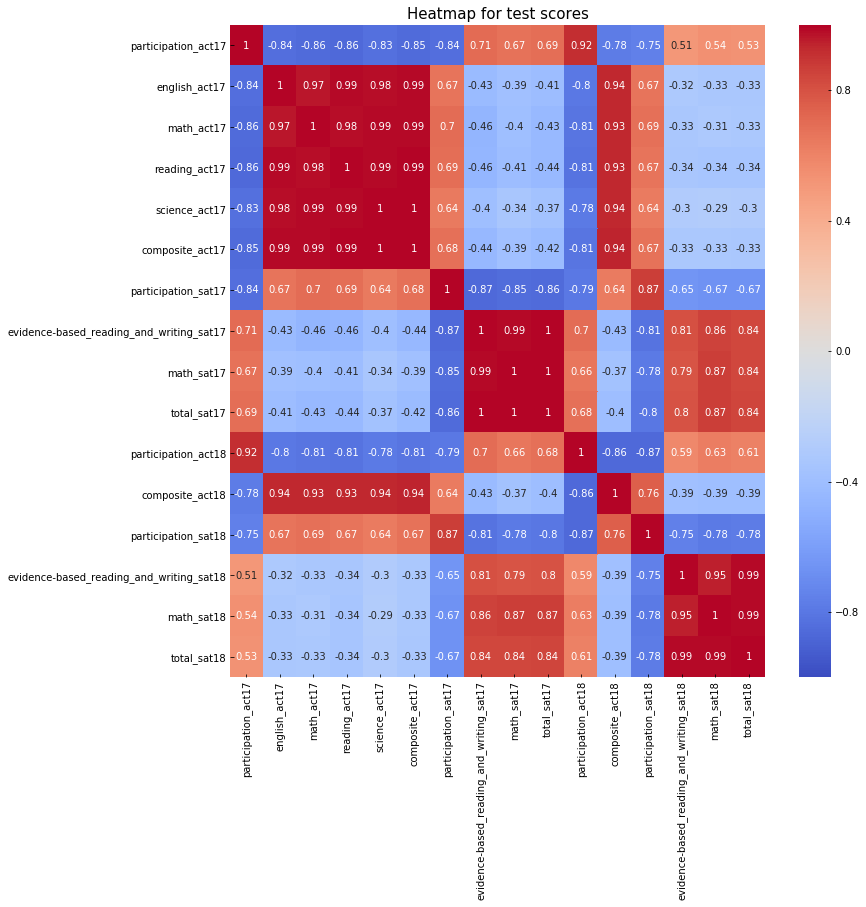

In [452]:
plt.figure(figsize=(12, 12))
sns.heatmap(tests.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
# fix for mpl bug that cuts off top/bottom of seaborn viz
# reference: https://github.com/mwaskom/seaborn/issues/1773
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.title('Heatmap for test scores', size=15);

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [488]:
def subplot_histogram(df, columns, ncols, title_list, x_label):
    nrows = int(np.ceil((len(columns))/ncols))  # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize = (12, 2.5 * nrows))
    plt.tight_layout(pad=4)
    
    ax = ax.ravel()  # Ravel turns a matrix into a vector, which is easier to iterate
    colors = ['b', 'r','green', 'y','black']
    for i, col in enumerate(columns):
        color = colors[i]
        ax[i].hist(df[col], color=color, alpha=1, bins=10)
        ax[i].set_title(title_list[i])
        ax[i].set_ylabel('Frequency')
        ax[i].set_xlabel(x_label)
        ax[i].axvline(df[col].mean(), color='red', linewidth=2)

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

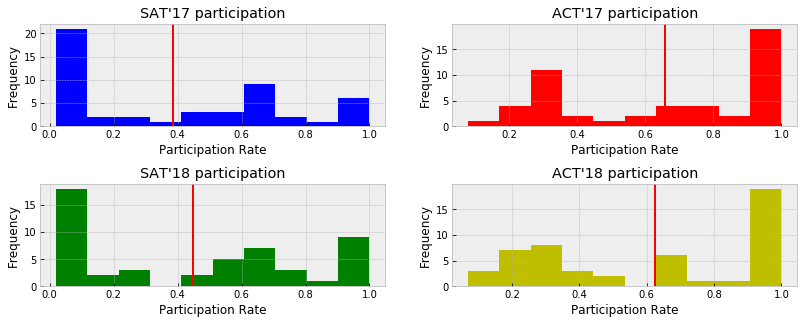

In [489]:
# Code
subplot_histogram(tests, ['participation_sat17','participation_act17','participation_sat18','participation_act18'], 2
             ,['SAT\'17 participation','ACT\'17 participation'
               ,'SAT\'18 participation','ACT\'18 participation'], 'Participation Rate')

Participation rate per state in a test is inversely proportional to the participation rate in the other test.

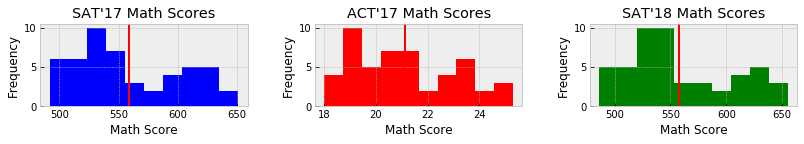

In [492]:
subplot_histogram(tests, ['math_sat17','math_act17','math_sat18'], 3
             ,['SAT\'17 Math Scores','ACT\'17 Math Scores','SAT\'18 Math Scores'], 'Math Score')

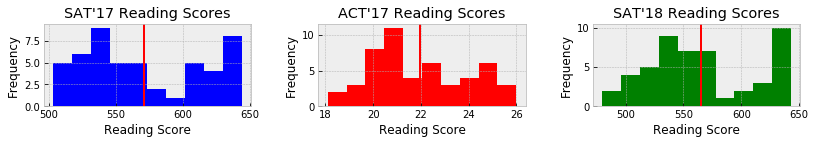

In [494]:
subplot_histogram(tests, ['evidence-based_reading_and_writing_sat17','reading_act17'
                     ,'evidence-based_reading_and_writing_sat18'], 3
             ,['SAT\'17 Reading Scores','ACT\'17 Reading Scores','SAT\'18 Reading Scores'], 'Reading Score')

The distribution of Math and Reading scores remain consistent through both the years.

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [516]:
# Code
def scatter(df, columns, title_list, xlabels, ylabels):
    fig, ax = plt.subplots(3, 2, figsize = (16, 2.5*3))
    #fig, ax = plt.regplot(3, 2)#, figsize = (16, 2.5*3))
    ax = ax.ravel()
    plt.style.use('bmh')
    plt.tight_layout(pad=5)

    for i, col in enumerate(columns):
        ax[i].scatter(df[col[0]],df[col[1]])
        #sns.regplot(df[col[0]],df[col[1]])
        #print(df[col[0]],df[col[1]])
        ax[i].set_title(title_list[i])
        ax[i].set_ylabel(ylabels[i])
        ax[i].set_xlabel(xlabels[i])
        #ax[i].plot(df[col[0]],df[col[1]])
    

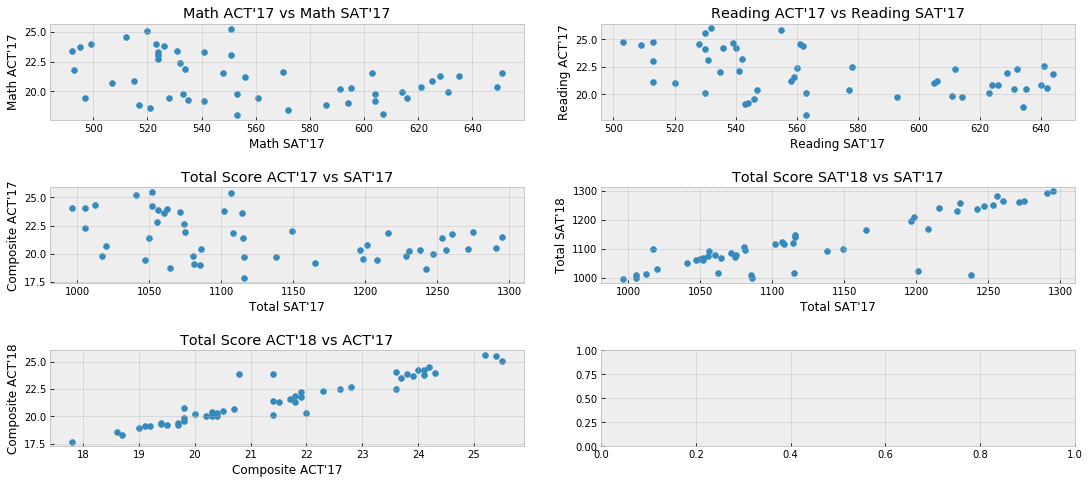

In [517]:
scatter(tests, [('math_sat17', 'math_act17'), ('evidence-based_reading_and_writing_sat17', 'reading_act17'),
        ('total_sat17', 'composite_act17'), ('total_sat17', 'total_sat18'), ('composite_act17', 'composite_act18')],
        ['Math ACT\'17 vs Math SAT\'17','Reading ACT\'17 vs Reading SAT\'17','Total Score ACT\'17 vs SAT\'17',
         'Total Score SAT\'18 vs SAT\'17','Total Score ACT\'18 vs ACT\'17'],
       ['Math SAT\'17', 'Reading SAT\'17', 'Total SAT\'17', 'Total SAT\'17', 'Composite ACT\'17'],
        ['Math ACT\'17', 'Reading ACT\'17', 'Composite ACT\'17', 'Total SAT\'18', 'Composite ACT\'18'])

Total ACT'17, total ACT'18 scores are linearly dependent on each other as are total SAT'17 and total SAT'18 scores, which means that the students' performances in these two tests have been consistent for both years.

There is no dependence between ACT and SAT scores in the same subjects either year, which means that the subsets taking those two sets are almost independent of each other, or that the tests greatly vary in their contents even for the same subjects.

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

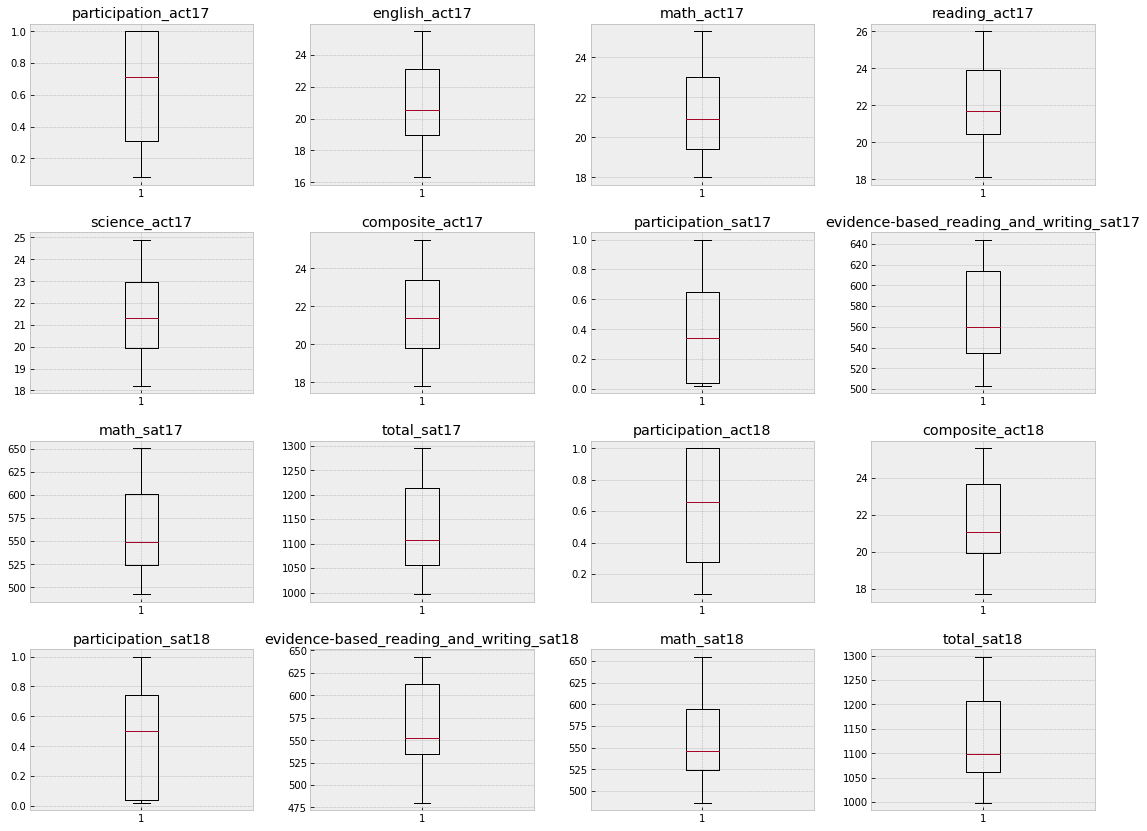

In [523]:
# Code
fig, ax = plt.subplots(4, 4, figsize = (16, 3*4))
ax = ax.ravel()
plt.tight_layout(pad=3)
colors = ['b','r','y','c','m','g']*3
for i, col in enumerate(tests.select_dtypes(include=['float64', 'int64']).columns): 
    ax[i].boxplot(tests[col])#, color=colors[i])
    ax[i].set_title(col)


#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

In [562]:
#tests[['state','participation_sat18', 'participation_act18']].sort_values(by='participation_sat18', ascending=False).set_index('state').plot(kind='barh', stacked=True, figsize= (25,25));

Text(0.5, 1.0, 'States with SAT and ACT participation rates both below 70%')

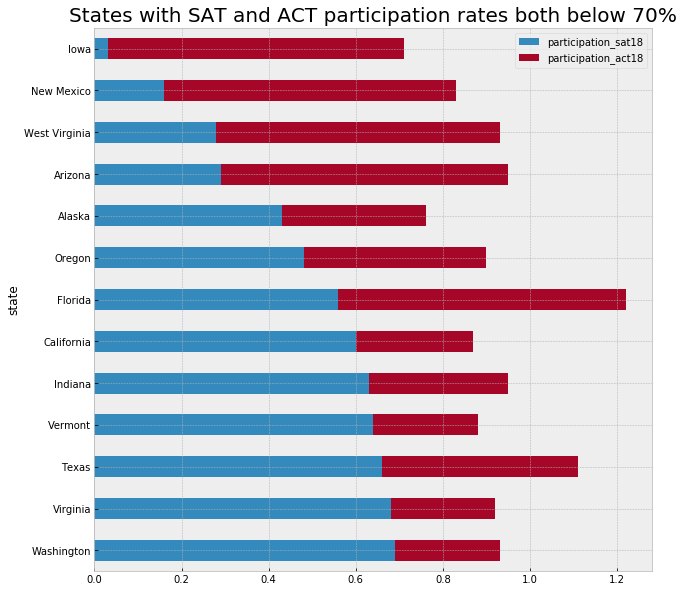

In [584]:
tests[(tests['participation_sat18'] < 0.7)&(tests['participation_act18'] < 0.7)][['state','participation_sat18', 'participation_act18']].sort_values(by='participation_sat18', ascending=False).set_index('state').plot(kind='barh', stacked=True, figsize= (10,10));
plt.title('States with SAT and ACT participation rates both below 70%', size = 20)

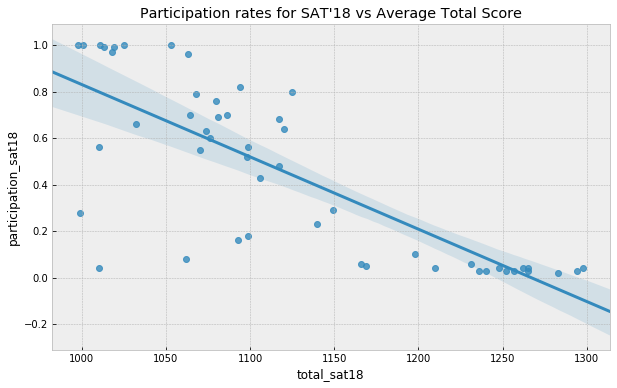

In [585]:
plt.figure(figsize=(10,6))
sns.regplot(tests['total_sat18'], tests['participation_sat18'])
plt.title('Participation rates for SAT\'18 vs Average Total Score');

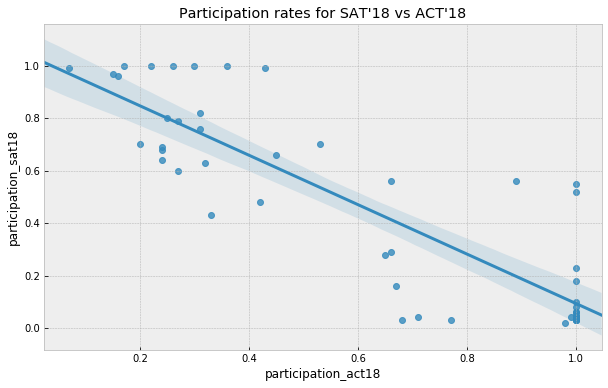

In [586]:
plt.figure(figsize=(10,6))
sns.regplot(tests['participation_act18'], tests['participation_sat18'])
plt.title('Participation rates for SAT\'18 vs ACT\'18');

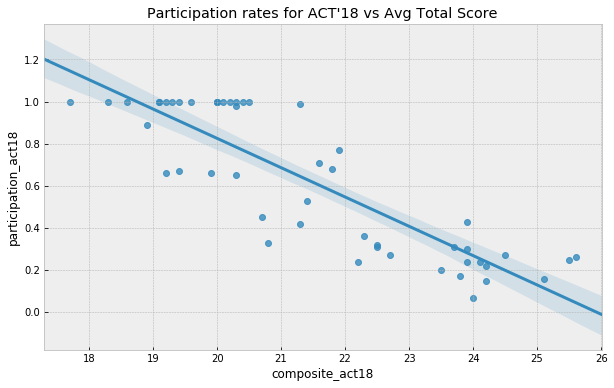

In [588]:
plt.figure(figsize=(10,6))
sns.regplot(tests['composite_act18'], tests['participation_act18'])
plt.title('Participation rates for ACT\'18 vs Avg Total Score');

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## More Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

In [298]:
tests[['state','participation_act17','participation_act18','participation_sat17','participation_sat18']]

,state,participation_act17,participation_act18,participation_sat17,participation_sat18
0,Alabama,1.00,1.00,0.05,0.06
1,Alaska,0.65,0.33,0.38,0.43
2,Arizona,0.62,0.66,0.30,0.29
3,Arkansas,1.00,1.00,0.03,0.05
4,California,0.31,0.27,0.53,0.60
5,Colorado,1.00,0.30,0.11,1.00
6,Connecticut,0.31,0.26,1.00,1.00
7,Delaware,0.18,0.17,1.00,1.00
8,Florida,0.73,0.66,0.83,0.56
9,Georgia,0.55,0.53,0.61,0.70


Illinois made SATs compulsary in 2017, which resulted in a big increase in SAT participation in 2018, and a drop in ACT in 2018.

Colorado made SATs compulsary in 2016, which followed the same trend in participation rates, but the change was reflected a  year later in 2018.

Alaska made both SAT and ACT optional in 2016. This drastically reduced ACT participation rates from 2017 to 2018, but SAT participation rates remained constant.

References:

https://www.erikthered.com/tutor/sat-act-history.html

https://www.adn.com/alaska-news/education/2016/06/30/students-no-longer-need-national-tests-to-graduate/

https://www.hanoverresearch.com/media/Best-Practices-to-Increase-SAT-Participation-1.pdf

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

In [299]:
tests[tests['state']=='Alaska']

,state,participation_act17,english_act17,math_act17,reading_act17,science_act17,composite_act17,participation_sat17,evidence-based_reading_and_writing_sat17,math_sat17,total_sat17,participation_act18,composite_act18,participation_sat18,evidence-based_reading_and_writing_sat18,math_sat18,total_sat18
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547,533,1080,0.33,20.8,0.43,562,544,1106


CONCLUSIONS
- SAT and ACT participation rates across all the US states are complements of each other, since most students take any one test, but not both in high school.
- States which have made either test compulsary have very high participation rates in that test, and very low participation in the other test.
- A few states which made both tests optional, or any one test mandatory have participation rates depending on the location. In other states, it depends on the students' preferences.
- Higher participation means less total score, because it's probably mandatory, and everyone takes the test, whether they want to or not, and whether they have prepared for it or not.
- Lower participation means more total score, because it's optional, and only people who are interested and have prepared for the test take it.
- Alaska and Iowa both have less than 80% participation in both tests together, which means more than 20% of the high school students in each of those states don't take any test.
- Since Iowa is in the Midwest, and ACTs are more popular in the Midwest, Alaska is a good choice to try and increase SAT participation.
- Both SAT and ACT were made optional in Alaska in 2016. This resulted in a drop in the ACT participation(65% in 2017 to 33% in 2018). 

RECOMMENDATIONS
- Students can be motivated to take the SATs if they're confident that they'll do will in the tests. This can be done by providing free test prep material/courses.
- Waiving the test fee initially.
- Offering the exam during regular school hours.
- Only 45.7% of Alaska high school students attend college compared to the national average of 63.3%. Promoting a culture which encourages students to pursue education after high school would increase the SAT patricipation rates.


## Bonus: Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer:

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer:

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [ ]:
# Code: